In [8]:
import time as time
import pandas as pd
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
from sorting import hybrid_sort, merge_sort
from comparison_counter import ComparisonCounter
from concurrent.futures import ThreadPoolExecutor, as_completed

%matplotlib inline
%config InlineBackend.figure_format='retina'

np.random.seed(13)

# Testing the sorting algorithm

In [2]:
arr1 = [14, 40, 31, 28, 3, 15, 17, 51]
arr2 = [23, 23, 23, 23, 23, 23, 23, 23]

In [3]:
comparison_counter = ComparisonCounter()

print(merge_sort(deepcopy(arr1), comparison_counter))
assert comparison_counter.get_count() == 16

comparison_counter.reset_count()
print(merge_sort(deepcopy(arr2), comparison_counter))
assert comparison_counter.get_count() == 12

[3, 14, 15, 17, 28, 31, 40, 51]
[23, 23, 23, 23, 23, 23, 23, 23]


In [4]:
comparison_counter.reset_count()
print(hybrid_sort(deepcopy(arr1), comparison_counter, 4))
assert comparison_counter.get_count() >= 16

comparison_counter.reset_count()
print(hybrid_sort(deepcopy(arr2), comparison_counter, 4))
assert comparison_counter.get_count() == 10

[3, 14, 15, 17, 28, 31, 40, 51]
[23, 23, 23, 23, 23, 23, 23, 23]


# Input generation

In [5]:
sizes = [1000, 10000, 100000, 1000000, 10000000]
inputs = [np.random.randint(1, size + 1, size) for size in sizes]

for i in range(len(inputs)):
    print("Size: ", len(inputs[i]))
    print("Min value:", min(inputs[i]))
    print("Max value:", max(inputs[i]))
    print()

Size:  1000
Min value: 2
Max value: 1000

Size:  10000
Min value: 1
Max value: 9999

Size:  100000
Min value: 1
Max value: 100000

Size:  1000000
Min value: 2
Max value: 1000000

Size:  10000000
Min value: 1
Max value: 10000000



# (c) i: Analyzing Key Comparisons for Different Input Size (Threshold S fixed at 32)

In [ ]:
np.random.seed(42)

comparison_counter = ComparisonCounter()
sizes = [
    i
    for j in (
        [1000 * k for k in range(1, 11)],
        [10000 * k for k in range(1, 11)],
        [100000 * k for k in range(1, 11)],
        [1000000 * k for k in range(1, 11)],
        [10000000],
    )
    for i in j
]
inputs = [np.random.randint(1, size + 1, size) for size in sizes]

comparisons = []
execution_times = []

In [7]:
for arr_input in inputs:
    comparison_counter.reset_count()
    arr_copy = arr_input.copy()

    start_time = time.time()
    hybrid_sort(arr_copy, comparison_counter, S=32)
    end_time = time.time()

    comparisons.append(comparison_counter.get_count())
    execution_times.append(end_time - start_time)

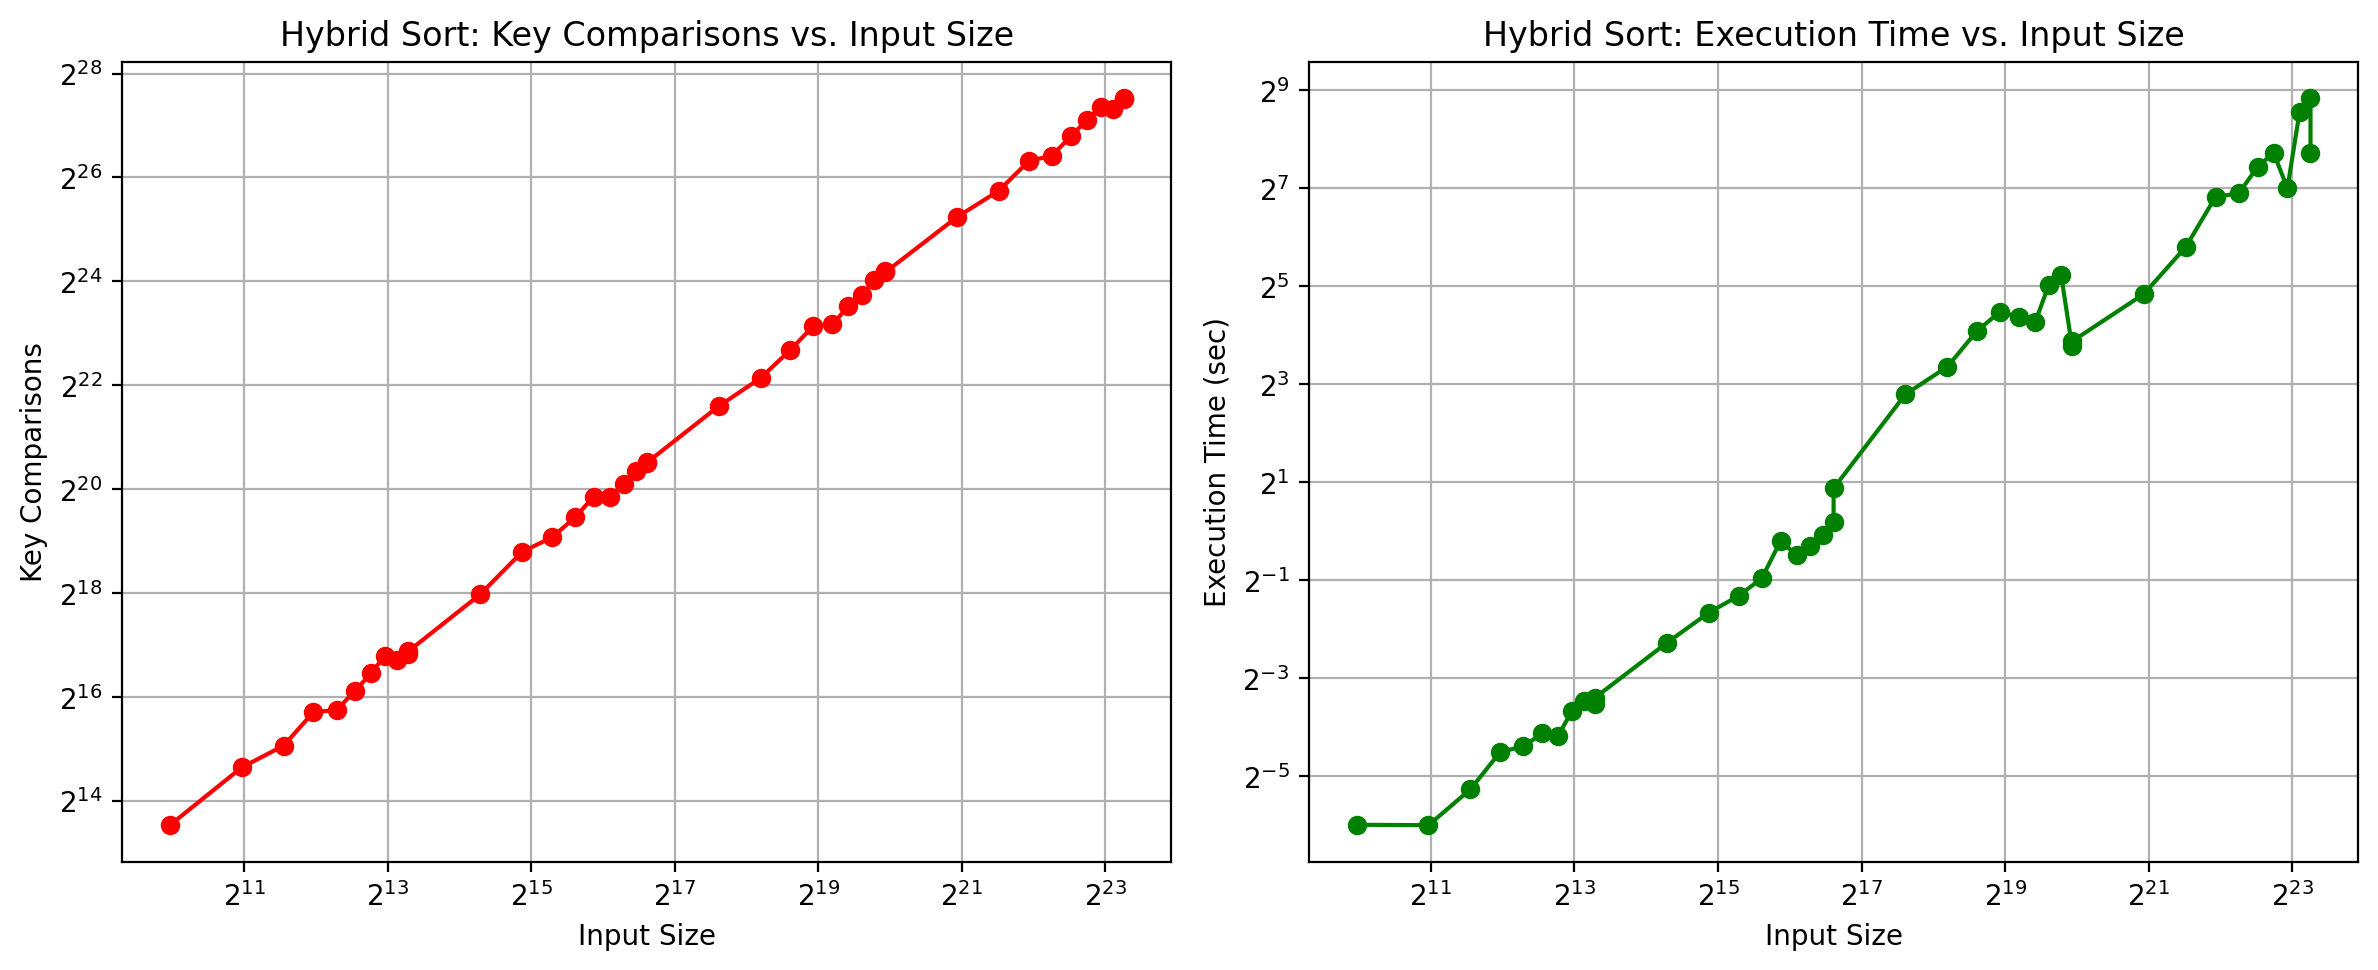

Results of Key Comparisons and Execution Times vs. Input Size:
     Input Size         Key Comparisons    Execution Time (sec)
          1000                11821               0.015728     
          2000                25536               0.015632     
          3000                34164               0.025967     
          4000                53448               0.044065     
          5000                54989               0.047617     
          6000                71269               0.057251     
          7000                90501               0.055541     
          8000               113683               0.078658     
          9000               107196               0.091098     
         10000               116247               0.086926     
         10000               120319               0.095086     
         20000               256939               0.206086     
         30000               453636               0.315940     
         40000               550317      

In [14]:
# Create a DataFrame
df = pd.DataFrame(
    {
        "Input Size": sizes,
        "Key Comparisons": comparisons,
        "Execution Time (sec)": execution_times,
    }
)

# Plot comparisons and execution time
plt.figure(figsize=(12, 5))

# Plot Key Comparisons vs. Input Size
plt.subplot(1, 2, 1)
plt.plot(df["Input Size"], df["Key Comparisons"], marker="o", linestyle="-", color="r")
plt.xscale("log", base=2)
plt.yscale("log", base=2)
plt.xlabel("Input Size")
plt.ylabel("Key Comparisons")
plt.title("Hybrid Sort: Key Comparisons vs. Input Size")
plt.grid(True)

# Plot Execution Time vs. Input Size
plt.subplot(1, 2, 2)
plt.plot(
    df["Input Size"], df["Execution Time (sec)"], marker="o", linestyle="-", color="g"
)
plt.xscale("log", base=2)
plt.yscale("log", base=2)
plt.xlabel("Input Size")
plt.ylabel("Execution Time (sec)")
plt.title("Hybrid Sort: Execution Time vs. Input Size")
plt.grid(True)

plt.tight_layout()
plt.show()

# Print table
print("Results of Key Comparisons and Execution Times vs. Input Size:")
print(df.to_string(index=False, justify="center", col_space=20))

## Comparison of Empirical Results with Theoretical Time Complexity
### Theoretical Analysis:

The Hybrid algorithm splits the array according to MergeSort until the unput size reaches threshold $S$, then Insertion Sort is called on the input array. Afterwards, $\frac{n}{S}$ sub-arrays of size $S$ are merged together.

The runtime complexity is determined by two parts:

1. $\frac{n}{S}$ calls of Insertion Sort on arrays of $S$ elements.
2. $\log\left( \frac{n}{S} \right)$ merge levels of arrays of size $S$.

For the average and worst case, the time complexity of the Insertion Sort component is $\frac{n}{S} \times O(S^{2})= O(n)$.
For the best case, the time complexity of the Insertion Sort component is $\frac{n}{S} \times O(S)= O(n \times S)$.

For the Merge component, there are $\log\left( \frac{n}{S} \right)$ merge levels, each level involves $O(n)$ comparisons, so the time complexity is $\log\left( \frac{n}{S} \right) \times O(n) = O\left( n \log\left( \frac{n}{S} \right) \right)$.

The total time complexity is then:
- The average and worst case: $O\left( n \times S + n\log\left( \frac{n}{S} \right) \right)$
- The best case: $O\left( n + n\log\left( \frac{n}{S} \right) \right)$.

For a fixed $S$, the time complexity can be simplified to $O(n + n \log(n)) = O(n \log(n))$ similar to MergeSort's. However, the number of actual key comparisons are expected to be higher for hybrid sort, but execution time can be expected to be lower due to time saving in memory allocation.

When plotting $\log(\text{key comparisons}) \text{vs} \log(\text{input size})$ for input size $n$, we expect to see a straight line with a slight upward bend.

### Empirical Results & Comparisons:

With a fixed threshold $S=32$, we observed the following:

- The graph of $\log(\text{key comparisons}) \text{vs} \log(\text{input size})$ was indeed a straight line with slope $\approx 1$ as expected.
- The graph of $\log(\text{execution time}) \text{vs} \log(\text{input size})$ looked roughly like a straight line, but did not show a clear trend with many dips and jumps.

### Conclusion:
- The empirical results aligned with theoretical analysis.

# (c) ii: Analyzing Key Comparisons for Different S Values

In [9]:
def sort_and_measure(arr_input, S):
    comparison_counter = ComparisonCounter()
    arr_copy = arr_input.copy()

    start_time = time.time()
    hybrid_sort(arr_copy, comparison_counter, S)
    end_time = time.time()

    return comparison_counter.get_count(), end_time - start_time


n = 100000  # Fixed input size
np.random.seed(42)
fixed_input = np.random.randint(1, n + 1, n)

In [10]:
# Prepare to collect results
comparisons = []
execution_times = []

In [11]:
# Use ThreadPoolExecutor for concurrent execution
with ThreadPoolExecutor() as executor:
    futures = {
        executor.submit(sort_and_measure, fixed_input, S): S for S in range(1, 200)
    }

    for future in as_completed(futures):
        S = futures[future]
        try:
            comparison_count, exec_time = future.result()
            comparisons.append((S, comparison_count))
            execution_times.append((S, exec_time))
        except Exception as exc:
            print(f"S generated an exception: {exc}")

# Sort results by S value
comparisons.sort()
execution_times.sort()

# Extract sorted values
S_values, comparison_counts = zip(*comparisons)
_, exec_times = zip(*execution_times)

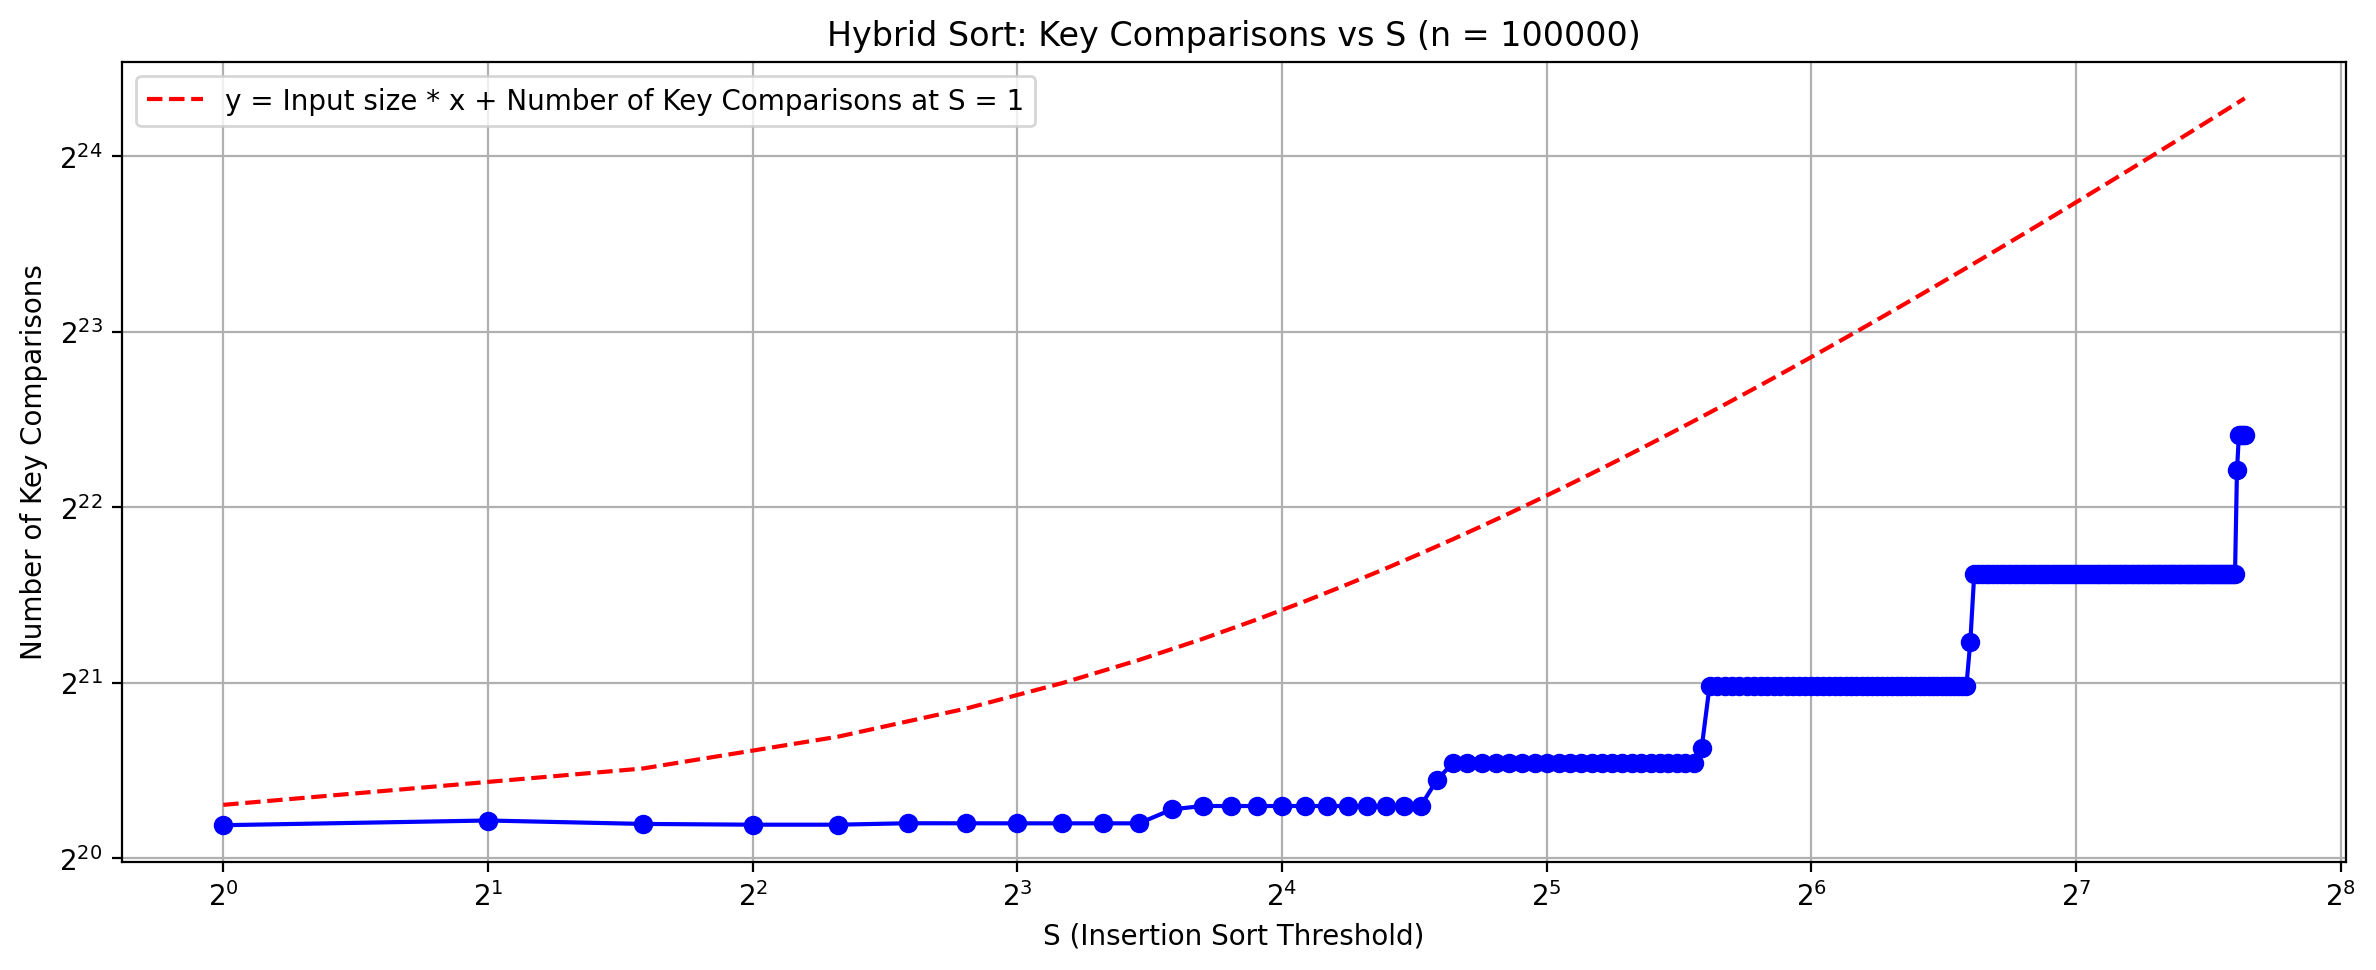

Results of Key Comparisons and Execution Times for Different S Values:
    S (Threshold)       Key Comparisons    Execution Time (sec)
          1                1195054              377.830299     
          2                1217412               10.665648     
          3                1201077               11.099405     
          4                1197437                8.533986     
          5                1197437               12.801548     
          6                1204317                9.548517     
          7                1203904               11.743207     
          8                1203904               12.721472     
          9                1203904               11.676265     
         10                1203904               10.240254     
         11                1203904               10.741218     
         12                1272462                8.755340     
         13                1289176               10.429756     
         14                128917

In [ ]:
# Create a DataFrame to hold the results
data = {
    "S (Threshold)": list(range(1, 200)),
    "Key Comparisons": comparison_counts,
    "Execution Time (sec)": exec_times,
}

df = pd.DataFrame(data)

# Plot comparisons
plt.figure(figsize=(12, 5))
plt.plot(
    df["S (Threshold)"], df["Key Comparisons"], marker="o", linestyle="-", color="b"
)
plt.xscale("log", base=2)
plt.yscale("log", base=2)
plt.xlabel("S (Insertion Sort Threshold)")
plt.ylabel("Number of Key Comparisons")
plt.title(f"Hybrid Sort: Key Comparisons vs S (n = {n})")
plt.grid(True)

# Draw a straight line y=x + df["Key Comparisons"][0] in dotted red
x = np.linspace(min(df["S (Threshold)"]), max(df["S (Threshold)"]), 100)
y = n * x + df["Key Comparisons"][0]
plt.plot(x, y, "r--", label=f"y = Input size * $ + Number of Key Comparisons at S = 1")

plt.legend()
plt.tight_layout()
plt.show()

# Print the table
print("Results of Key Comparisons and Execution Times for Different S Values:")
print(df.to_string(index=False, justify="center", col_space=20))

## Comparison of Empirical Results with Theoretical Time Complexity

### Theoretical Analysis of the Time Complexity

With the total time complexity of the Hybrid Sort algorithm:
$$
O(n\times S + n \log \frac{n}{S})
$$

Approximately, for a constant $n$, the time complexity based on $S$ can be simplified to $O(S)$, which means the number of key comparisons can be expected to increase approximately linearly with the threshold value.

In more details, the increase in the number of key comparisons can be expected to follow a staircase pattern. Let's us examine the size of the subarrays split by the MergeSort algorithm

<img src="https://i.ibb.co/VWMk7Tqm/Drawing-2025-02-15-13-17-23-excalidraw.png" alt="Staircase" style="display:block; margin:auto; width:600px;" />

At each level, the sub array will have size $\frac{n}{2^{k}}$. When $S$ is $\frac{n}{2^{k}} - 1$, the subarrays will be split another level. But for all $S$ between $\frac{n}{2^{k-1}} - 1$ and  $\frac{n}{2^{k}}$, Insertion Sort will be called on the subarrays of this level, resulting in equal number of key comparisons for all $S$ in the range $\left[ \frac{n}{2^k}, \frac{n}{2^{k-1}} - 1 \right]$.

### Empirical Results

With a fixed input size $n = 100,000$, the number of key comparisons was observed to increase as $S$ increases, with characteristics:
- Grew more slowly than a linear function $y = \text{Input size} \times S + \text{Number of Key Comparisons at } S=1$, indicating that time complexity is indeed $O(S)$.
- Exhibited a staircase pattern of increasing.

that matched the expectations.

### Conclusion
The empirical results match the theoretical analysis.